# 集合与字典的性能

In [1]:
# Run this cell first!

import time
import random
from matplotlib import pyplot as plt

### 感受 *缓慢*

在之前的 notebook 中，你*看到了*列表运行的速度是多么的缓慢。但随着列表变得越来越大，执行归属测试所需的时间也会变得越来越长。

但你还是可以*感受*到速度的缓慢。比较一下，运行下面两个单元格各自需要多长时间。

In [2]:
# SMALL list membership tests

small_list = list(range(10)) # ten element list of integers
nonexistent_element = -1
num_trials = 5000

start = time.clock()

# do lots of membership tests
for _ in range(num_trials):
    nonexistent_element in small_list

end = time.clock()
millis = (end-start) * 1000
print("Execution complete! That took", millis, "milliseconds")

Execution complete! That took 2.634999999999943 milliseconds


In [3]:
# BIG list membership tests

big_list = list(range(100000)) # 100K element list of integers
nonexistent_element = -1
num_trials = 5000

start = time.clock()

# do lots of membership tests
for _ in range(num_trials):
    nonexistent_element in big_list

end = time.clock()
millis = (end-start) * 1000
print("Execution complete! That took", millis, "milliseconds")

Execution complete! That took 8110.151 milliseconds


那太**无聊** 了，对吧？

等待代码执行，即使只需要几秒钟，也已被证明是世界上最枯燥的事情。当无人驾驶汽车的代码运行速度很慢时，它可能会非常危险。

幸运的是，我们通常可以通过选择正确的数据结构来**大大**加快代码的运行速度。

### 感受 *速度*

下面的代码单元格与上面的代码单元格完全相同，除了它们在第一行中使用`set`而不是`list` 。

In [4]:
# SMALL set membership tests

small_set = set(range(10)) # ten element list of integers
nonexistent_element = -1
num_trials = 5000

start = time.clock()

# do lots of membership tests
for _ in range(num_trials):
    nonexistent_element in small_set

end = time.clock()
millis = (end-start) * 1000
print("Execution complete! That took", millis, "milliseconds")

Execution complete! That took 0.6149999999998101 milliseconds


### 拭目以待吧！

![drum roll](https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a04cbf1_drum-roll/drum-roll.gif)

还记得大列表的运行速度*慢得多么让人崩溃*吗？现在，抓紧你的座位，拭目以待吧！

In [5]:
# BIG set membership tests

big_set = set(range(100000)) # 100K element list of integers
nonexistent_element = -1
num_trials = 5000

start = time.clock()

# do lots of membership tests
for _ in range(num_trials):
    nonexistent_element in big_set

end = time.clock()
millis = (end-start) * 1000
print("Execution complete! That took", millis, "milliseconds")

Execution complete! That took 0.6190000000003693 milliseconds


![fast car](https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a04cd26_fast-sport-car-1466168667pxr/fast-sport-car-1466168667pxr.jpg)

### 退后一步

"对不起，你要重复运行代码。有时候我在编程时会太过激动，以至于忽略了那些声音“把你的动作连贯起来！写一个函数，不要再重复了！”

现在我要听听那个声音，清理这个代码，并告诉你集合运行的速度有多快。

In [6]:
def test_data_structure_speed(data_structure_type, size, N=50):
    if data_structure_type != dict:
        data_structure = data_structure_type(range(size))
    else:
        data_structure = {num: "value" for num in range(size)}
    nonexistent_element = -1
    
    start = time.clock()
    for _ in range(N):
        nonexistent_element in data_structure
    end = time.clock()
    
    millis = (end-start) * 1000
    return millis    

In [7]:
# set test
test_data_structure_speed(set, 100000, N=1000)

0.07699999999921658

In [8]:
# list test
test_data_structure_speed(list, 100000, N=1000)

1561.4849999999994

In [9]:
# dictionary test
test_data_structure_speed(dict, 100000, N=1000)

0.07400000000146179

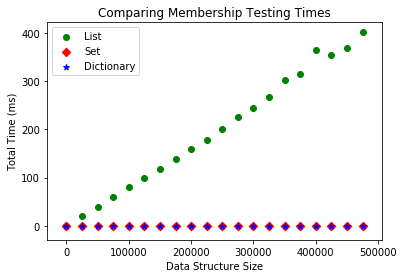

In [10]:
sizes = list(range(0, 500000, 25000))
list_speeds = [test_data_structure_speed(list, size) for size in sizes]
set_speeds  = [test_data_structure_speed(set,  size) for size in sizes]
dict_speeds = [test_data_structure_speed(dict, size) for size in sizes]

plt.scatter(sizes, list_speeds, c='g', marker="o") #green circle
plt.scatter(sizes, set_speeds,  c='r', marker="D") #red diamond
plt.scatter(sizes, dict_speeds, c='b', marker="*") #blue star

plt.xlabel("Data Structure Size")
plt.ylabel("Total Time (ms)")
plt.legend(["List", "Set", "Dictionary"])
plt.title("Comparing Membership Testing Times")
plt.show()

正如你所看到的，集合与字典的性能不依赖于集合/字典的大小，而且归属测试的速度一直 **很快**。速度快就好。